In [122]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os 

In [123]:
print('Esperamos trabalhar no diretório')
print(os.getcwd())


Esperamos trabalhar no diretório
C:\Users\Ester Quintino\Documents\GitHub\CienciaDosDados


In [124]:
#Se usar o arquivo descompactado
#pd.read_csv('DOM2015.csv',sep=',')

#Se usar o arquivo compactado como está no dropbox púbico
Documento = pd.read_csv('DOM2015csv.zip', compression='zip', header=0, sep=',', quotechar='"')


In [125]:
#Código do professor
dados=pd.read_csv('DOM2015csv.zip', compression='zip', header=0, sep=',', quotechar='"')
dados_resumidos=dados.loc[:,["V02322","V4105","V4621","V02426","UF"]]
dados_resumidos.to_csv("resumo.csv")
dados_resumidos.head()


,V02322,V4105,V4621,V02426,UF
0,4.0,1,800.0,NaN,11
1,NaN,1,NaN,NaN,11
2,2.0,1,1150.0,2.0,11
3,2.0,1,793.0,2.0,11
4,4.0,1,2900.0,NaN,11


In [142]:

#Código do Professor
dados_não_nulos = dados_resumidos#[pd.notnull(Documento.V02322)&pd.notnull(Documento.V4105)&pd.notnull(Documento.V4621)&pd.notnull(Documento.V02426)&pd.notnull(Documento.UF)]
dados_não_nulos.head()


,V02322,V4105,V4621,V02426,UF
0,4.0,1,800.0,NaN,11
1,NaN,1,NaN,NaN,11
2,2.0,1,1150.0,2.0,11
3,2.0,1,793.0,2.0,11
4,4.0,1,2900.0,NaN,11


In [143]:
#dados_não_nulos=dados_não_nulos.rename(columns={"V02322":"Tem acesso à internet no próprio domicílio","V4105":"Código de situação censitária","V4621":"Renda mensal domiciliar percapita","V02426":"O acesso à internet é feito por banda larga","UF":"Unidade da Federação"})
#Caso o sua coluna contenha sim, não, Não sabe
#dados_não_nulos.V0205= Documentoastype("category")
#dados_não_nulos.V0205.cat.categories = {["Sim","Não","Não sabe"]}
dados_não_nulos.head()

,V02322,V4105,V4621,V02426,UF
0,4.0,1,800.0,NaN,11
1,NaN,1,NaN,NaN,11
2,2.0,1,1150.0,2.0,11
3,2.0,1,793.0,2.0,11
4,4.0,1,2900.0,NaN,11


In [144]:
#Mudanças categorias
dados_não_nulos.V02322=dados.V02322.astype('category')
dados_não_nulos.V02322.cat.categories=(["Sim","Não"])
dados_não_nulos.V02426=dados.V02322.astype('category')
dados_não_nulos.V02426.cat.categories=(["Sim","Não"])


dados_não_nulos.UF=dados.UF.astype('category')
dados_não_nulos.UF.cat.categories=(["Rondônia","Acre","Amazonas","Roraima","Pará","Amapá","Tocantins","Maranhão","Piauí","Ceará","Rio Grande do Norte","Paraíba","Pernambuco","Alagoas","Sergipe","Bahia","Minas Gerais","Espírito Santo","Rio de Janeiro","São Paulo","Paraná","Santa Catarina","Rio Grande do Sul","Mato Grosso do Sul","Mato Grosso","Goías","Distrito Federal"])
dados_não_nulos.loc[(dados_não_nulos.UF=="Rondônia")|(dados_não_nulos.UF=="Acre")|(dados_não_nulos.UF=="Amazonas")|(dados_não_nulos.UF=="Roraima")|(dados_não_nulos.UF=="Pará")|(dados_não_nulos.UF=="Amapá")|(dados_não_nulos.UF=="Tocantins")|(dados_não_nulos.UF=="Maranhão")|(dados_não_nulos.UF=="Piauí")|(dados_não_nulos.UF=="Ceará")|(dados_não_nulos.UF=="Rio Grande do Norte")|(dados_não_nulos.UF=="Paraíba")|(dados_não_nulos.UF=="Pernambuco")|(dados_não_nulos.UF=="Alagoas")|(dados_não_nulos.UF=="Sergipe")|(dados_não_nulos.UF=="Bahia")|(dados_não_nulos.UF=="Minas Gerais")|(dados_não_nulos.UF=="Espírito Santo")|(dados_não_nulos.UF=="Rio de Janeiro")|(dados_não_nulos.UF=="São Paulo")|(dados_não_nulos.UF=="Paraná")|(dados_não_nulos.UF=="Santa Catarina")|(dados_não_nulos.UF=="Rio Grande do Sul")|(dados_não_nulos.UF=="Mato Grosso do Sul")|(dados_não_nulos.UF=="Mato Grosso")|(dados_não_nulos.UF=="Goiás")|(dados_não_nulos.UF=="Distrito Federal"),"Regiões"]="Brasil"
dados_não_nulos.head()




,V02322,V4105,V4621,V02426,UF,Regiões
0,Não,1,800.0,Não,Rondônia,Brasil
1,NaN,1,NaN,NaN,Rondônia,Brasil
2,Sim,1,1150.0,Sim,Rondônia,Brasil
3,Sim,1,793.0,Sim,Rondônia,Brasil
4,Não,1,2900.0,Não,Rondônia,Brasil


In [145]:
#Criar nomes para as colunas
#MEU OBJETIVO AGORA É FAZER A FILTRAGEM
#Fazer a mesma substituição de UF para V4105

In [146]:
ct = pd.crosstab(dados_não_nulos.UF, dados_não_nulos.V02426)
ct.head()

V02426,Sim,Não
UF,,
Rondônia,965,1222
Acre,608,713
Amazonas,1500,1712
Roraima,431,306
Pará,3318,3260


Sim    67834
Não    49767
Name: V02426, dtype: int64

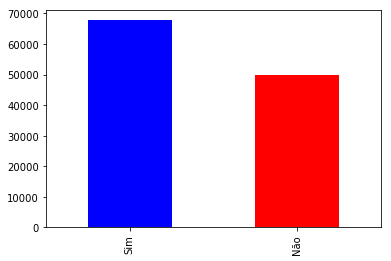

In [147]:
dfc = dados_não_nulos.V02426.value_counts()
dfc.plot(kind='bar', color=('blue', 'red'), legend=False)
dfc.head()


São Paulo            17291
Minas Gerais         13977
Rio Grande do Sul    12356
Bahia                11858
Rio de Janeiro       11191
Name: UF, dtype: int64

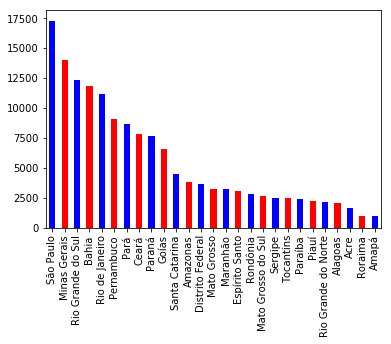

In [149]:
dfc = dados_não_nulos.UF.value_counts()
dfc.plot(kind='bar', color=('blue', 'red'), legend=False)
dfc.head()

Sim    67834
Não    49767
Name: V02322, dtype: int64

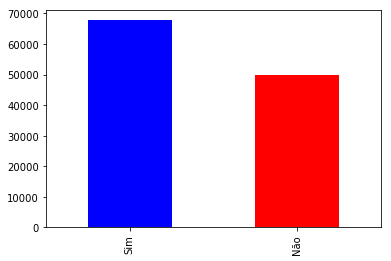

In [150]:
dfc = dados_não_nulos.V02322.value_counts()
dfc.plot(kind='bar', color=('blue', 'red'), legend=False)
dfc.head()